In [65]:
from scipy.stats import median_abs_deviation as mad
import numpy as np
import rasterio
import matplotlib.pyplot as plt
# import gftt

In [28]:
def rolling_mad_2d(a, chipsize=33):
    '''
    chipsize must be an odd number.
    '''
    retreat = chipsize // 2
    out = np.zeros((a.shape[0] - retreat * 2, a.shape[1] - retreat * 2))
    for i in range(retreat, a.shape[0] - retreat):
        for j in range(retreat, a.shape[1] - retreat):
            chip = a[i-retreat:i+retreat+1, j-retreat:j+retreat+1]
            out[i-retreat, j-retreat] = mad(chip, axis=None)
            
    return out

90

In [29]:
result_x_geotiffs = ['../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_A_vx.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_B_vx.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_C_vx.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_D_vx.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_E_vx.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_F_vx.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_G_vx.tif']
result_y_geotiffs = ['../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_A_vy.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_B_vy.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_C_vy.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_D_vy.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_E_vy.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_F_vy.tif',
                     '../../data/CARST/20180818-20180903/20180818-20180903_velo-raw_G_vy.tif']

In [31]:
result_x = []
result_y = []

for fn in result_x_geotiffs:
    ds = rasterio.open(fn)
    result_x.append(ds.read(1))
for fn in result_y_geotiffs:
    ds = rasterio.open(fn)
    result_y.append(ds.read(1))

In [61]:
mx = []
my = []

for i in range(len(result_x)):
    m = rolling_mad_2d(result_x[i])
    mx.append(m)
    m = rolling_mad_2d(result_y[i])
    my.append(m)

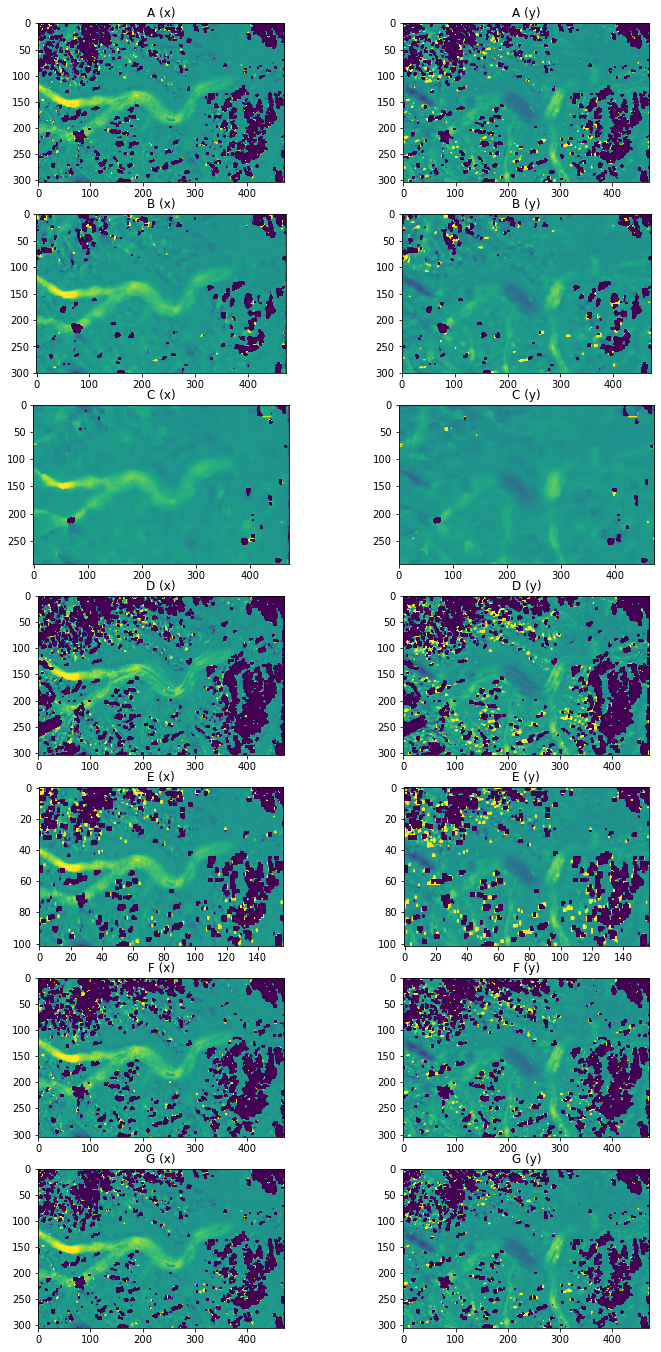

In [62]:
fig, ax1 = plt.subplots(7, 2, figsize=(12, 24))
title_string = [['A (x)', 'A (y)'], 
                ['B (x)', 'B (y)'],
                ['C (x)', 'C (y)'],
                ['D (x)', 'D (y)'],
                ['E (x)', 'E (y)'],
                ['F (x)', 'F (y)'],
                ['G (x)', 'G (y)'],]
for i in range(len(result_x)):
    ax1[i, 0].imshow(result_x[i], vmin = -1, vmax = 1)
    ax1[i, 0].set_title(title_string[i][0])
    ax1[i, 1].imshow(result_y[i], vmin = -1, vmax = 1)
    ax1[i, 1].set_title(title_string[i][1])

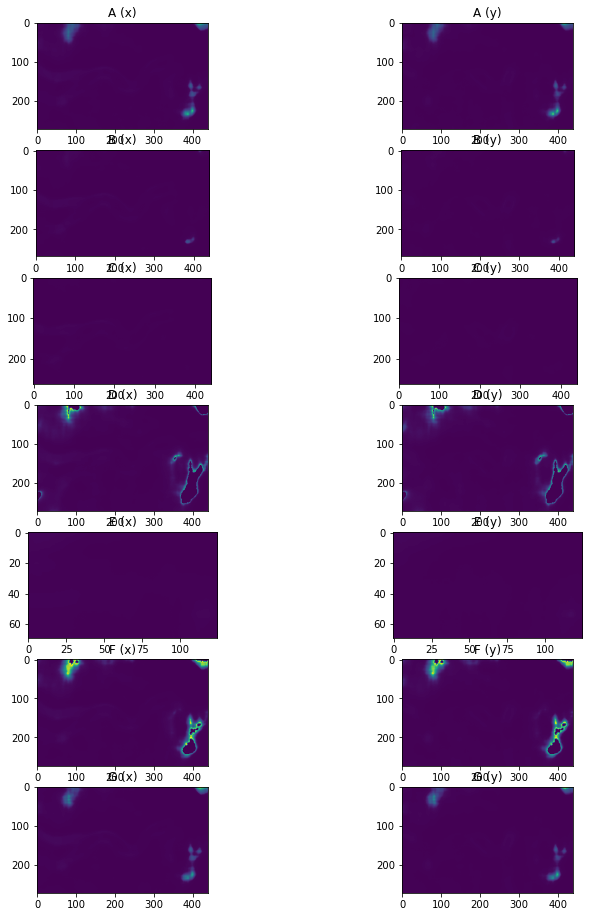

In [63]:
fig, ax2 = plt.subplots(7, 2, figsize=(12, 16))
for i in range(len(result_x)):
    ax2[i, 0].imshow(mx[i], vmin = 0, vmax = 15)
    ax2[i, 0].set_title(title_string[i][0])
    ax2[i, 1].imshow(my[i], vmin = 0, vmax = 15)
    ax2[i, 1].set_title(title_string[i][1])

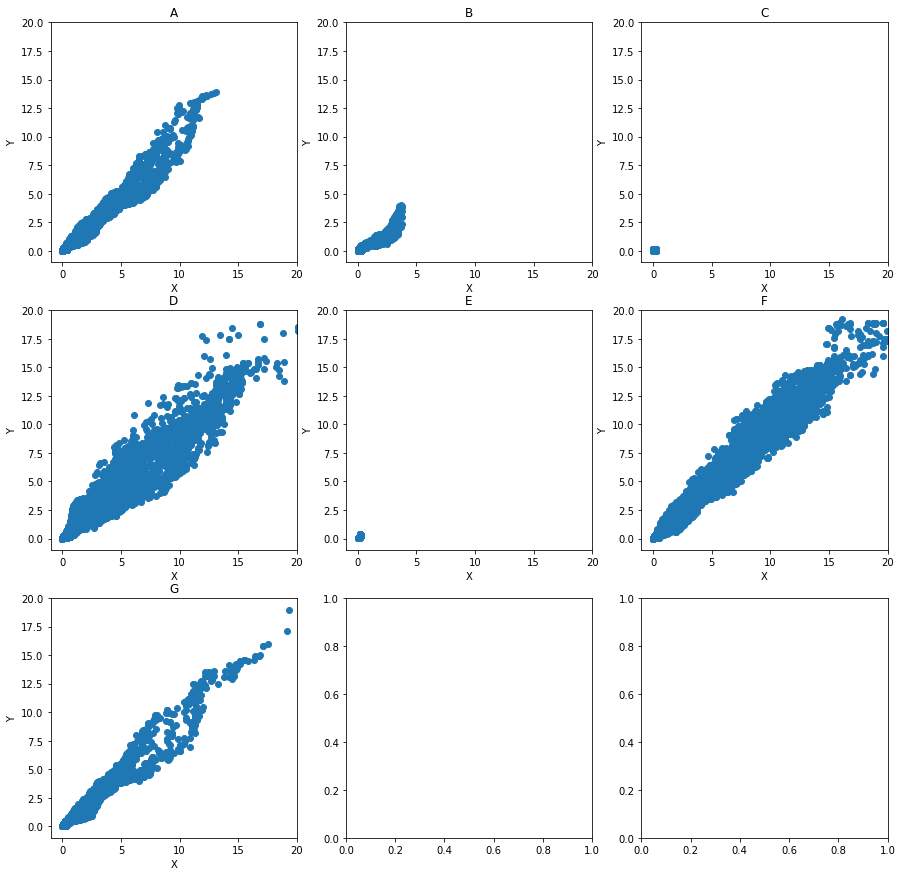

In [71]:
fig, ax4 = plt.subplots(3, 3, figsize=(15, 15))

# viridis = cm.get_cmap('viridis', 12)
pt_style = {'s': 6, 'edgecolor': None}
xbound = (-1, 20)
ybound = (-1, 20)
title_string = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

for i in range(len(result_x)):
    j = i // 3
    k = i % 3
    # np.logical_and(result_x[i] > -9000, result_y[i] > -9000
    ax4[j, k].scatter(mx[i].flatten(), my[i].flatten())
    # ax4[j, k].scatter(diff_x[i][thres_idx[i]],  diff_y[i][thres_idx[i]], c=z[i][thres_idx[i]], **pt_style)
    # ax4[j, k].scatter(diff_x[i][~thres_idx[i]], diff_y[i][~thres_idx[i]], color=viridis(0), alpha=0.4, **pt_style)
    ax4[j, k].set_xlim(xbound)
    ax4[j, k].set_ylim(ybound)
    ax4[j, k].set_title(title_string[i])
    ax4[j, k].set_xlabel('X')
    ax4[j, k].set_ylabel('Y')

In [73]:
!cat ../../data/CARST/20180818-20180903/Readme.txt

[A]
refwindow = 32
searchwindow = 9
skip = 8
gaussian_hp = 1

[B]
refwindow = 64
searchwindow = 9
skip = 8
gaussian_hp = 1

[C]
refwindow = 128
searchwindow = 9
skip = 8
gaussian_hp = 1

[D]
refwindow = 32
searchwindow = 9
skip = 8
gaussian_hp = 0

[E]
refwindow = 32
searchwindow = 9
skip = 24
gaussian_hp = 1

[F]
refwindow = 32
searchwindow = 9
skip = 8
gaussian_hp = 1 (sigma = 9)

[G]
refwindow = 32
searchwindow = 9
skip = 8
gaussian_hp = 2 (GHP-3sig_Canny2dila-masked)